In [3]:
# importing the stuff I need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
# Defining the classes

class cst_plane_Robot_Link:
    def __init__(self, Length=1, mass=1, ip=(0,0), ang=0):
        self.Length = Length
        self.mass = mass
        self.ip = ip
        self.ang = ang
        self.fp = self.calculate_fp(self.ang, self.Length, self.ip)
        
        
    def calculate_fp(self, ang, Length, ip):
        rot_mat  = np.array([[np.cos(ang), -np.sin(ang)],
                                 [np.sin(ang), np.cos(ang)]]) 
        rel_vect = np.round(np.dot(rot_mat,np.array([Length,0])),5)
        fp = rel_vect + ip
        return fp
        
    def rotate(self, nang):
        self.ang = nang
        self.fp = self.calculate_fp(nang, self.Length, self.ip)
        
    def plot(self, ax, **kwargs):
        ax.plot([self.ip[0], self.fp[0]], [self.ip[1], self.fp[1]], **kwargs)
        return self.fp
    

class plane_COBOT:
    def __init__(self, thetas=[np.pi/4, np.pi,-np.pi/4], 
                 Lengths=[1, 0.2, 1.2, 0.5]  , Masses=[1, 1, 1, 1],
                 Inertias=[1, 1, 1, 1], basePoint=[0,0]):
        self.thetas = thetas
        self.Lengths = Lengths
        self.Masses = Masses
        self.Inertias = Inertias
        self.basePoint = basePoint
        self.PGDp = self.PGD()
        self.Link_1 = cst_plane_Robot_Link(ip=(0,0), Length = self.Lengths[0], ang= self.thetas[0])
        self.Link_2 = cst_plane_Robot_Link(ip=(0,0), Length = self.Lengths[1], ang= self.thetas[1])
        self.Link_3 = cst_plane_Robot_Link(ip=self.PGDp[1], Length = -self.Lengths[2], ang= self.thetas[1])
        self.Link_4 = cst_plane_Robot_Link(ip=self.PGDp[2], Length = self.Lengths[3], ang= self.thetas[2])
        self.Link_5 = cst_plane_Robot_Link(ip=self.PGDp[0], Length = self.Lengths[0], ang= self.thetas[0])
                                                               
    
    def PGD(self):
        e1 = np.array([np.cos(self.thetas[0]), np.sin(self.thetas[0])])
        e2 = np.array([np.cos(self.thetas[1]), np.sin(self.thetas[1])])
        e3 = np.array([np.cos(self.thetas[2]+self.thetas[1]+self.thetas[0]),
                       np.sin(self.thetas[2]+self.thetas[1]+self.thetas[0])])
        p1 = np.array(self.basePoint)+(self.Lengths[1]*e2)
        p2 = p1 + (self.Lengths[0]*e1)
        p3 = p2 - (self.Lengths[2]*e2)
        p  = p3 + (self.Lengths[3]*e3)
        return [p1, p2, p3, p]
        
    def plot(self, ax, **kwargs):
        
        self.Link_2.plot(ax, **kwargs)
        self.Link_3.plot(ax, **kwargs)
        self.Link_1.plot(ax, **kwargs)
        self.Link_4.plot(ax, **kwargs)
        self.Link_5.plot(ax, **kwargs)

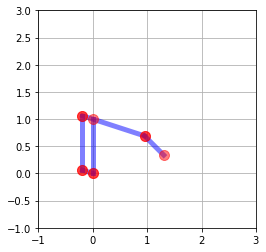

In [10]:
# Testing the stuff
test_Cobot = plane_COBOT(thetas=[0.5*np.pi, 0.9*np.pi,-0.25*np.pi], 
                 Lengths=[1, 0.2, 1.2, 0.5]  , Masses=[1, 1, 1, 1],
                 Inertias=[1, 1, 1, 1], basePoint=[0,0])



fig2, ax2 = plt.subplots()
ax2.grid('on')
ax2.set_aspect('equal', 'box')
ax2.set_xlim(-1, 3); ax2.set_ylim(-1, 3)

test_Cobot.plot(ax2, lw=5, marker = '.', color = 'b',
                markersize=20, markerfacecolor='r', markeredgecolor='r', alpha=0.5)
